In [1]:
# Importing library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
# Creating a data scructure with 60 timesteps and 1 output
X_train = []
Y_train = []
for i in range (60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    Y_train.append(training_set_scaled[i, 0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [5]:
# Importing KERAS
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [6]:
# Initializing the RNN
regressor = Sequential()

# Adding the first LSTM layer and some dropout regularization
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [7]:
# Adding second LSTM layer and some another dropout regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [8]:
# Adding third LSTM layer and some another dropout regularization
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

In [9]:
# Adding fourth LSTM layer and some another dropout regularization
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [10]:
# Adding output layer
regressor.add(Dense(units=1))

In [11]:
# Compiling
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
# fitting the RNN to training set
regressor.fit(X_train, Y_train, epochs=20, batch_size=32)

Epoch 1/20
38/38 [==============================] - 12s 112ms/step - loss: 0.0466
Epoch 2/20
38/38 [==============================] - 5s 120ms/step - loss: 0.0072
Epoch 3/20
38/38 [==============================] - 4s 117ms/step - loss: 0.0054
Epoch 4/20
38/38 [==============================] - 4s 112ms/step - loss: 0.0057
Epoch 5/20
38/38 [==============================] - 5s 123ms/step - loss: 0.0051
Epoch 6/20
38/38 [==============================] - 5s 119ms/step - loss: 0.0057
Epoch 7/20
38/38 [==============================] - 5s 122ms/step - loss: 0.0046
Epoch 8/20
38/38 [==============================] - 4s 114ms/step - loss: 0.0044
Epoch 9/20
38/38 [==============================] - 5s 120ms/step - loss: 0.0043
Epoch 10/20
38/38 [==============================] - 5s 125ms/step - loss: 0.0038
Epoch 11/20
38/38 [==============================] - 5s 128ms/step - loss: 0.0049
Epoch 12/20
38/38 [==============================] - 5s 145ms/step - loss: 0.0037
Epoch 13/20
38/38 [=====

In [13]:
## regressor.save('models/Epoch150')

In [14]:
# Importing testing set
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_set = dataset_test.iloc[:, 1:2].values

In [15]:
# Getting the predicted stock
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_set = regressor.predict(X_test)
predicted_stock_set = sc.inverse_transform(predicted_stock_set)

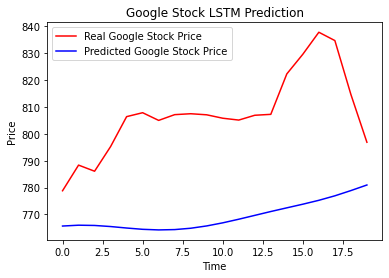

In [16]:
# visualizing
plt.plot(real_stock_set, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_set, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock LSTM Prediction')
plt.xlabel('Time')
plt.ylabel('Price')

plt.legend()
plt.show()